In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle 

In [2]:
with open('./data/test.pkl', 'rb') as fd:
    unpickledTest = pickle.load(fd)

with open('./data/train.pkl', 'rb') as fd:
    unpickledTrain = pickle.load(fd)

In [3]:
#partition Data
testData = unpickledTest

np.random.shuffle(unpickledTrain)
trainData = np.split(unpickledTrain, 10)


In [10]:
maxDegree = 20
numModels = 10

bias2Arr = np.zeros(maxDegree)
varianceArr = np.zeros(maxDegree)

y_res_arr = np.zeros(maxDegree)

for deg in range(maxDegree): 
    predMatrix = np.zeros((numModels,len(testData[:, 0])))
    predMatrix2 = np.zeros(len(testData[:, 0]))

    for i in range(numModels): #should be 0, 10
        poly = PolynomialFeatures(degree = deg+1)
        # reshaping data
        X_train = poly.fit_transform(trainData[i][:, 0].reshape(-1, 1))
        y_train = trainData[i][:, 1].reshape(-1, 1)
        X_test = poly.fit_transform(testData[:, 0].reshape(-1, 1))
        y_test = testData[:, 1].reshape(-1, 1)

        reg = LinearRegression()
        reg.fit(X_train, y_train)
        
        y_pred = reg.predict(X_test)
        # print(y_pred.reshape(len(y_pred)).shape)
        predMatrix[i] = y_pred.reshape( len(y_pred))
        predMatrix2 += y_pred.reshape( len(y_pred))
        # print(y_pred)
#         plt.scatter(testData[:, 0], y_test)
#         plt.scatter(testData[:, 0], y_pred)
#         plt.title(str(deg+1) + ' ' + str(i))
#         plt.show()
    predMatrix2 /= numModels
#     y_res_arr[deg] = np.mean(predMatrix,axis=1)
#     bias2Arr[deg] = np.mean((np.mean(predMatrix, axis =1) - testData[:, 1]) ** 2)
    bias2Arr[deg] = np.mean((np.mean(predMatrix2) - testData[:, 1]) ** 2)
    varianceArr[deg] = np.mean(np.var(predMatrix, axis = 1))
#     varianceArr[deg] = np.var(predMatrix2)
#     print(varianceArr[deg])
#     print(np.mean(np.var(predMatrix, axis = 1)))
    print(bias2Arr[deg])
    print(np.mean((np.mean(predMatrix, axis =0) - testData[:, 1]) ** 2))


6665972.917891815
1005221.0618701068
6661951.115836923
954036.3457896278
6611386.915153338
9039.33208727319
6611273.015665445
7687.838715779768
6611217.5886488
7330.530730471309
6611218.072557687
7854.225694811348
6611156.267183797
8545.260716672154
6611224.687714858
9323.927927885718
6611180.841680771
9226.115121044171
6611200.465065993
9463.508484185959
6611220.374447147
9440.381171595849
6611131.353207948
22549.916935940702
6611392.449439096
14056.62076716774
6611726.248593947
35077.834241979246
6612384.535011672
63957.70173444929
6612353.139497733
74301.6580458215
6613678.105692916
126301.89339890852
6613708.26542735
138823.4575385734
6615710.408597028
216843.06307643923
6615952.587565919
233013.1510020434


In [5]:
print(np.var(np.array([1,23,46,23,1,32,54,2,143,64,345,1,243,65,3,321,41,443,124,1243,325,234,34])))

69801.77693761815


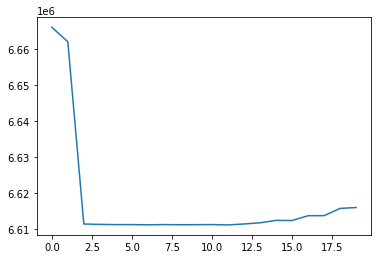

In [6]:
# plt.plot(varianceArr)
plt.plot(bias2Arr)
plt.show()

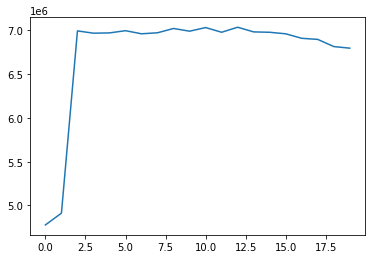

In [7]:
plt.plot(varianceArr)
plt.show()